In [37]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
matplotlib inline

In [39]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [40]:
simulator = my_provider.get_backend('ibmq_5_yorktown')

In [41]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [ ]:
# Initializing the variables for A.
J = 0.5
h1 = -0.5
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        res[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [ ]:
print(res)

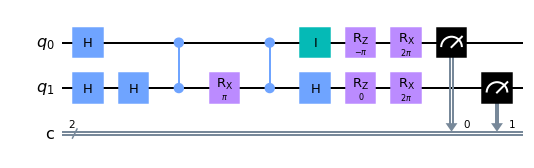

In [7]:
#Draw the current circuit
qc.draw(output='mpl')

{'00': 240, '01': 244, '10': 248, '11': 268}


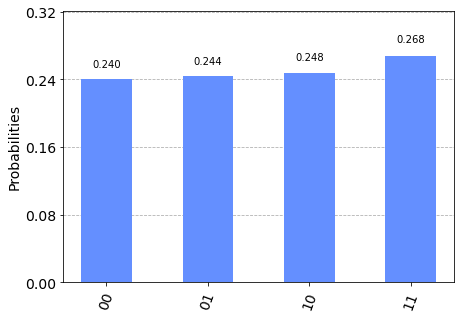

In [8]:
result = execute(qc, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

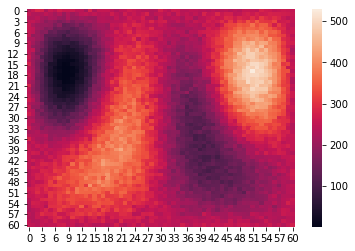

In [9]:
# Making a heatmap plot
sns.heatmap(res[:, :, 2])

In [10]:
# Initializing the variables for B.
J = 0
h1 = -1
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        res[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [11]:
print(res)

[[[234. 244. 264. 258.]
  [249. 259. 250. 242.]
  [244. 267. 240. 249.]
  ...
  [272. 241. 228. 259.]
  [248. 262. 226. 264.]
  [271. 278. 224. 227.]]

 [[277. 241. 229. 253.]
  [262. 242. 225. 271.]
  [260. 264. 238. 238.]
  ...
  [245. 228. 265. 262.]
  [263. 230. 260. 247.]
  [275. 235. 245. 245.]]

 [[250. 262. 225. 263.]
  [239. 261. 241. 259.]
  [233. 266. 238. 263.]
  ...
  [261. 237. 264. 238.]
  [255. 241. 275. 229.]
  [246. 251. 240. 263.]]

 ...

 [[228. 259. 239. 274.]
  [256. 230. 266. 248.]
  [274. 226. 260. 240.]
  ...
  [217. 262. 226. 295.]
  [240. 278. 242. 240.]
  [257. 270. 250. 223.]]

 [[254. 230. 273. 243.]
  [243. 216. 264. 277.]
  [248. 251. 240. 261.]
  ...
  [259. 234. 245. 262.]
  [249. 250. 272. 229.]
  [255. 220. 240. 285.]]

 [[243. 247. 255. 255.]
  [278. 233. 246. 243.]
  [254. 257. 245. 244.]
  ...
  [268. 251. 248. 233.]
  [256. 252. 239. 253.]
  [220. 276. 259. 245.]]]


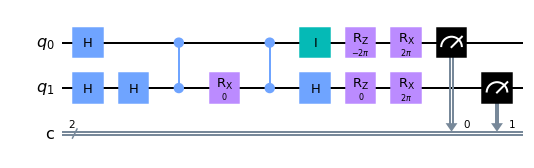

In [12]:
#Draw the current circuit
qc.draw(output='mpl')

{'00': 255, '01': 254, '10': 218, '11': 273}


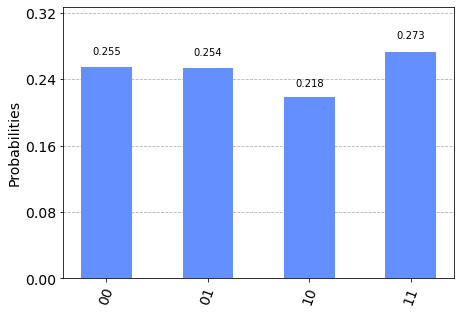

In [13]:
result = execute(qc, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

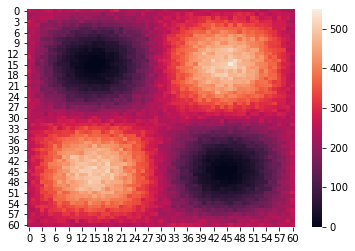

In [14]:
# Making a heatmap plot
sns.heatmap(res[:, :, 2])

In [16]:
# Initializing the variables for C.
J = 0
h1 = -0.5
h2 = 0.5

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        res[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [17]:
print(res)

[[[254. 258. 245. 243.]
  [227. 266. 247. 260.]
  [266. 250. 244. 240.]
  ...
  [270. 265. 226. 239.]
  [225. 256. 273. 246.]
  [244. 261. 243. 252.]]

 [[270. 261. 233. 236.]
  [275. 253. 236. 236.]
  [246. 255. 259. 240.]
  ...
  [254. 252. 259. 235.]
  [252. 241. 253. 254.]
  [221. 281. 239. 259.]]

 [[259. 231. 263. 247.]
  [241. 224. 288. 247.]
  [230. 273. 245. 252.]
  ...
  [250. 251. 244. 255.]
  [264. 243. 245. 248.]
  [242. 264. 226. 268.]]

 ...

 [[232. 236. 261. 271.]
  [254. 247. 265. 234.]
  [229. 252. 237. 282.]
  ...
  [260. 247. 240. 253.]
  [245. 231. 266. 258.]
  [250. 245. 248. 257.]]

 [[254. 261. 247. 238.]
  [252. 254. 250. 244.]
  [241. 253. 254. 252.]
  ...
  [235. 272. 254. 239.]
  [241. 251. 241. 267.]
  [253. 226. 260. 261.]]

 [[248. 228. 271. 253.]
  [245. 239. 244. 272.]
  [288. 228. 234. 250.]
  ...
  [265. 259. 219. 257.]
  [241. 274. 253. 232.]
  [252. 255. 248. 245.]]]


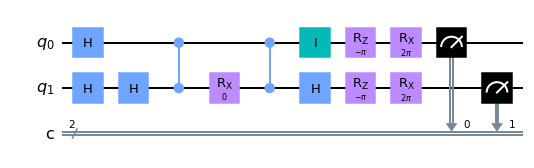

In [18]:
#Draw the current circuit
qc.draw(output='mpl')

{'00': 243, '01': 241, '10': 255, '11': 261}


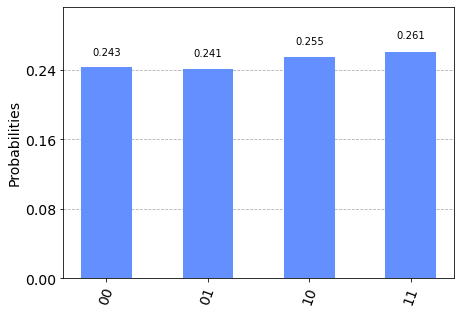

In [19]:
result = execute(qc, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

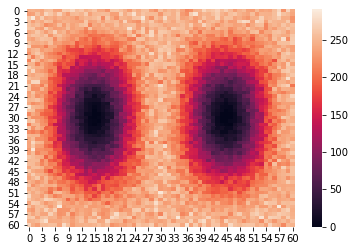

In [21]:
# Making a heatmap plot
sns.heatmap(res[:, :, 2])

In [22]:
# Initializing the variables for D.
J = 1
h1 = 0
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        res[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [23]:
print(res)

[[[264. 252. 245. 239.]
  [232. 247. 243. 278.]
  [250. 251. 251. 248.]
  ...
  [249. 262. 246. 243.]
  [232. 254. 248. 266.]
  [244. 258. 234. 264.]]

 [[260. 261. 243. 236.]
  [257. 238. 240. 265.]
  [257. 247. 247. 249.]
  ...
  [242. 261. 277. 220.]
  [224. 266. 254. 256.]
  [253. 276. 230. 241.]]

 [[236. 278. 241. 245.]
  [260. 226. 257. 257.]
  [248. 214. 223. 315.]
  ...
  [226. 259. 258. 257.]
  [238. 270. 278. 214.]
  [258. 216. 251. 275.]]

 ...

 [[260. 238. 238. 264.]
  [215. 281. 265. 239.]
  [237. 295. 247. 221.]
  ...
  [272. 222. 211. 295.]
  [284. 217. 230. 269.]
  [283. 257. 222. 238.]]

 [[259. 235. 229. 277.]
  [240. 256. 260. 244.]
  [232. 269. 260. 239.]
  ...
  [238. 252. 261. 249.]
  [251. 225. 247. 277.]
  [266. 257. 227. 250.]]

 [[247. 234. 270. 249.]
  [249. 243. 267. 241.]
  [229. 245. 277. 249.]
  ...
  [254. 258. 231. 257.]
  [278. 229. 225. 268.]
  [237. 218. 256. 289.]]]


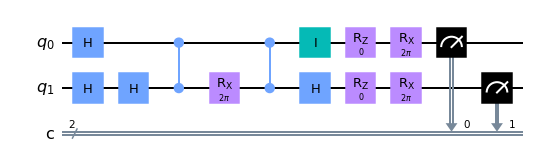

In [24]:
#Draw the current circuit
qc.draw(output='mpl')

{'00': 239, '01': 248, '10': 259, '11': 254}


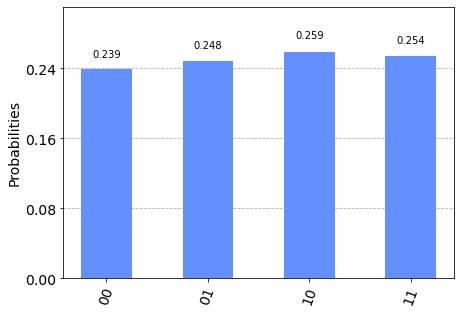

In [25]:
result = execute(qc, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

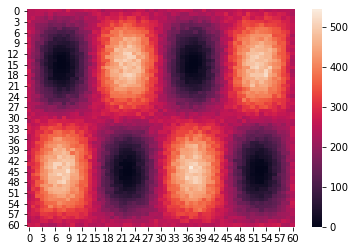

In [26]:
# Making a heatmap plot
sns.heatmap(res[:, :, 2])